<a href="https://colab.research.google.com/github/goswamiayush201/ECOMZY/blob/main/ANN_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [2]:
#import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
dataset=pd.read_csv("Churn_Modelling.csv")

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#divide the dataset into independent and dependent features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [8]:
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [12]:
#Feature Engineering

geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [16]:
#concatenate these variables with dataframe

X=X.drop(['Geography','Gender'],axis=1)

KeyError: "['Geography', 'Gender'] not found in axis"

In [17]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [18]:
pd.concat([X,geography,gender],axis=1)  #axis =1 make sure that concatenation should be column wise not row wise.

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [19]:
#splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [21]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.96147213, -1.41636539, -0.69539349, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 0.15932282,  0.3900109 ,  1.03972843, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  0.64920267,
         0.97481699, -0.81456811]])

In [23]:
X_train.shape

(8000, 8)

In [24]:
##part 2 : Create ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout



In [25]:
#Lets Initialize the ANN
classifier=Sequential()

In [26]:
##Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [27]:
#Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [28]:
#Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [31]:
#Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [32]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
#Early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


In [35]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8671 - loss: 0.3392 - val_accuracy: 0.8395 - val_loss: 0.3722
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8656 - loss: 0.3396 - val_accuracy: 0.8493 - val_loss: 0.3748
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8641 - loss: 0.3395 - val_accuracy: 0.8455 - val_loss: 0.3740
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8755 - loss: 0.3252 - val_accuracy: 0.8429 - val_loss: 0.3704
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8719 - loss: 0.3222 - val_accuracy: 0.8376 - val_loss: 0.3722
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8609 - loss: 0.3445 - val_accuracy: 0.8406 - val_loss: 0.3717
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8675 - loss: 0.3379 - val_accuracy: 0.8432 - val_loss: 0.3713
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8635 - loss: 0.3348 - 

In [36]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

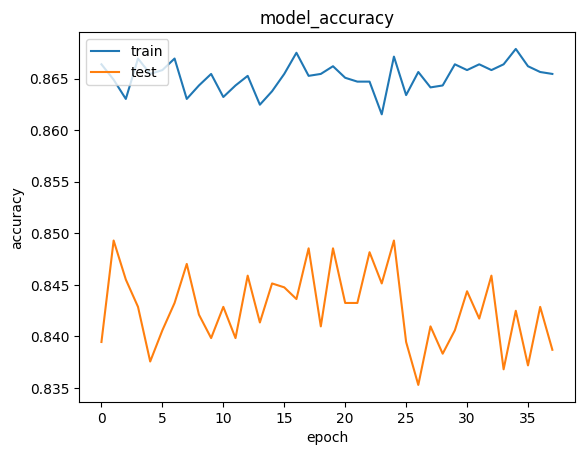

In [37]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

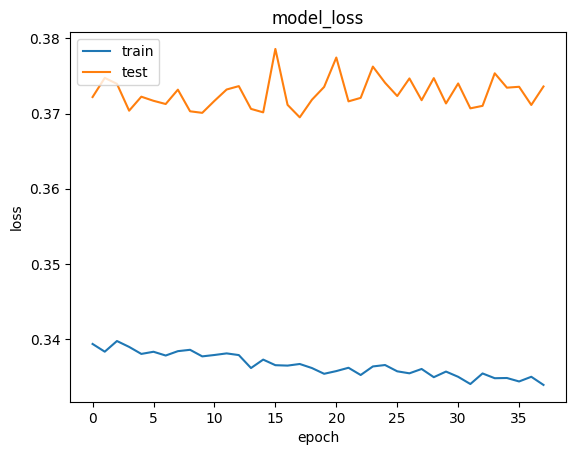

In [38]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [39]:
#step3 making the predictions and evaluating the model
# predicting the test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [40]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1508,   99],
       [ 188,  205]])

In [41]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8565